# Composition of Sine Waves
The code lets you combine four sine waves into a composite one.
First execute all code cells. Then, the composed signal will appear on the top row and the individual sine waves on the bottom row. 

Tip: Try to combine waves with large amplitudes and low frequencies, with waves with small amplitudes and high frequencies.

Provided by Prof. Dr. Jens Grubert, 2022.

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# prepare sine wave data
x = np.linspace(0, 2*np.pi, 2000)
amplitudes = np.array([1.0, 1.0, 1.0, 1.0])
frequencies = np.array([1, 1, 1, 1])
phases = np.array([0, 0, 0, 0])

def prepare_sin_waves():
    sin_waves = [amplitudes[0] * np.sin(frequencies[0] * x + phases[0])]
    for i in range(1, len(amplitudes)): 
        sin_waves.append(amplitudes[i] * np.sin(frequencies[i] * x + phases[i]) )
    return sin_waves

x = np.linspace(0, 2*np.pi, 400)
sin_waves = 0
sin_waves = prepare_sin_waves()

In [3]:
# function to plot the sine waves
def trigStaticN(x, sin_array, fig1, ax1, fig2, ax2):
    ax1.clear()
    ax2.clear()

    ax1.set_xlim([0, 2*np.pi])
    ax1.set_ylim([-5, 5]) # todo: update dynamically
    ax1.set_axisbelow(True)
    ax1.yaxis.grid(color='gray', linestyle='dashed')
    ax1.xaxis.grid(color='gray', linestyle='dashed')
    ax1.set_title("Composed Signal")
    
    ax2.set_xlim([0, 2*np.pi])
    ax2.set_ylim([-5, 5]) # todo: update dynamically
    ax2.set_axisbelow(True)
    ax2.yaxis.grid(color='gray', linestyle='dashed')
    ax2.xaxis.grid(color='gray', linestyle='dashed')
    ax2.set_title("Individual Sine Waves")

    # show x axis using PI ticks
    unit = 0.5
    x_tick = np.arange(0, 2 + unit, unit)
    x_label = [r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"]
    ax1.set_xticks(x_tick * np.pi)
    ax1.set_xticklabels(x_label, fontsize=10)

    ax2.set_xticks(x_tick * np.pi)
    ax2.set_xticklabels(x_label, fontsize=10)

    composed_sin = np.zeros(x.size)
    # plot individual sine waves
    for s in sin_array:        
        ax2.plot(x, s, linewidth=1)#, color='#dd0000')
        composed_sin = composed_sin + s    
    # plot composed wave
    ax1.plot(x, composed_sin, linewidth=2, color='#dd0000')
    

In [4]:
# definition of widgets

# these parameters determine the range and step size of the amplitude, frequency and phase sliders
min_frequency = 0
max_frequency = 64
frequency_step = 1

min_phase = -np.pi
max_phase = np.pi
phase_step = np.pi/8

def on_amplitudeSlider1_changed(change):
    amplitudes[0] = change['new']
    sin_waves = prepare_sin_waves()
    trigStaticN(x, sin_waves, fig1, ax1, fig2, ax2)
    
def on_amplitudeSlider2_changed(change):
    amplitudes[1] = change['new']
    sin_waves = prepare_sin_waves()
    trigStaticN(x, sin_waves, fig1, ax1, fig2, ax2)

def on_amplitudeSlider3_changed(change):
    amplitudes[2] = change['new']
    sin_waves = prepare_sin_waves()
    trigStaticN(x, sin_waves, fig1, ax1, fig2, ax2)

def on_amplitudeSlider4_changed(change):
    amplitudes[3] = change['new']
    sin_waves = prepare_sin_waves()
    trigStaticN(x, sin_waves, fig1, ax1, fig2, ax2)
    
####

def on_frequencySlider1_changed(change):
    frequencies[0] = change['new']
    sin_waves = prepare_sin_waves()
    trigStaticN(x, sin_waves, fig1, ax1, fig2, ax2)
    
def on_frequencySlider2_changed(change):
    frequencies[1] = change['new']
    sin_waves = prepare_sin_waves()
    trigStaticN(x, sin_waves, fig1, ax1, fig2, ax2)
    
def on_frequencySlider3_changed(change):
    frequencies[2] = change['new']
    sin_waves = prepare_sin_waves()
    trigStaticN(x, sin_waves, fig1, ax1, fig2, ax2)
    
def on_frequencySlider4_changed(change):
    frequencies[3] = change['new']
    sin_waves = prepare_sin_waves()
    trigStaticN(x, sin_waves, fig1, ax1, fig2, ax2)

####

def on_phaseSlider1_changed(change):
    phases[0] = change['new']
    sin_waves = prepare_sin_waves()
    trigStaticN(x, sin_waves, fig1, ax1, fig2, ax2)
    
def on_phaseSlider2_changed(change):
    phases[1] = change['new']
    sin_waves = prepare_sin_waves()
    trigStaticN(x, sin_waves, fig1, ax1, fig2, ax2)
    
def on_phaseSlider3_changed(change):
    phases[2] = change['new']
    sin_waves = prepare_sin_waves()
    trigStaticN(x, sin_waves, fig1, ax1, fig2, ax2)
    
def on_phaseSlider4_changed(change):
    phases[3] = change['new']
    sin_waves = prepare_sin_waves()
    trigStaticN(x, sin_waves, fig1, ax1, fig2, ax2)
    
    
def setup_gui():
    amplitudeSlider1 = widgets.FloatSlider(value=1, min=0, max=2, step=0.1, description='Amplitude 1:', readout_format='.2f')
    amplitudeSlider1.observe(on_amplitudeSlider1_changed, 'value') 
    amplitudeSlider2 = widgets.FloatSlider(value=1, min=0, max=2, step=0.1, description='Amplitude 2:', readout_format='.2f')
    amplitudeSlider2.observe(on_amplitudeSlider2_changed, 'value') 
    amplitudeSlider3 = widgets.FloatSlider(value=1, min=0, max=2, step=0.1, description='Amplitude 3:', readout_format='.2f')
    amplitudeSlider3.observe(on_amplitudeSlider3_changed, 'value') 
    amplitudeSlider4 = widgets.FloatSlider(value=1, min=0, max=2, step=0.1, description='Amplitude 4:', readout_format='.2f')
    amplitudeSlider4.observe(on_amplitudeSlider4_changed, 'value') 
    
    frequencySlider1 = widgets.FloatSlider(value=1, min=min_frequency, max=max_frequency, step=frequency_step, description='Frequency 1:', readout_format='.1f')
    frequencySlider1.observe(on_frequencySlider1_changed, 'value') 
    frequencySlider2 = widgets.FloatSlider(value=1, min=min_frequency, max=max_frequency, step=frequency_step, description='Frequency 2:', readout_format='.1f')
    frequencySlider2.observe(on_frequencySlider2_changed, 'value') 
    frequencySlider3 = widgets.FloatSlider(value=1, min=min_frequency, max=max_frequency, step=frequency_step, description='Frequency 3:', readout_format='.1f')
    frequencySlider3.observe(on_frequencySlider3_changed, 'value') 
    frequencySlider4 = widgets.FloatSlider(value=1, min=min_frequency, max=max_frequency, step=frequency_step, description='Frequency 4:', readout_format='.1f')
    frequencySlider4.observe(on_frequencySlider4_changed, 'value') 
    
    phaseSlider1 = widgets.FloatSlider(value=0, min=min_phase, max=max_phase, step=phase_step, description='Phase 1:', readout_format='.1f')
    phaseSlider1.observe(on_phaseSlider1_changed, 'value') 
    phaseSlider2 = widgets.FloatSlider(value=0, min=min_phase, max=max_phase, step=phase_step, description='Phase 2:', readout_format='.1f')
    phaseSlider2.observe(on_phaseSlider2_changed, 'value') 
    phaseSlider3 = widgets.FloatSlider(value=0, min=min_phase, max=max_phase, step=phase_step, description='Phase 3:', readout_format='.1f')
    phaseSlider3.observe(on_phaseSlider3_changed, 'value') 
    phaseSlider4 = widgets.FloatSlider(value=0, min=min_phase, max=max_phase, step=phase_step, description='Phase 4:', readout_format='.1f')
    phaseSlider4.observe(on_phaseSlider4_changed, 'value') 
    
    
    items_wave1 = [amplitudeSlider1, frequencySlider1, phaseSlider1]
    items_wave2 = [amplitudeSlider2, frequencySlider2, phaseSlider2]
    items_wave3 = [amplitudeSlider3, frequencySlider3, phaseSlider3]
    items_wave4 = [amplitudeSlider4, frequencySlider4, phaseSlider4]
    # phaseSlider1, amplitudeSlider2, frequencySlider2, phaseSlider2, amplitudeSlider3, frequencySlider3, phaseSlider3, amplitudeSlider4, frequencySlider4, phaseSlider4]
#widgets.GridBox(items, layout=widgets.Layout(grid_template_columns="repeat(3, 1)"))
    
    wave1_box = widgets.HBox(items_wave1)
    wave2_box = widgets.HBox(items_wave2)
    wave3_box = widgets.HBox(items_wave3)
    wave4_box = widgets.HBox(items_wave4)

    children = [wave1_box, wave2_box, wave3_box, wave4_box]
    tab = widgets.Tab()
    tab.children = children
    titles = ["Wave 1", "Wave 2", "Wave 3", "Wave 4"]
    for i in range(len(children)):
        tab.set_title(i, titles[i])
        
    tab.layout=widgets.Layout(width='80%')
    return tab
        

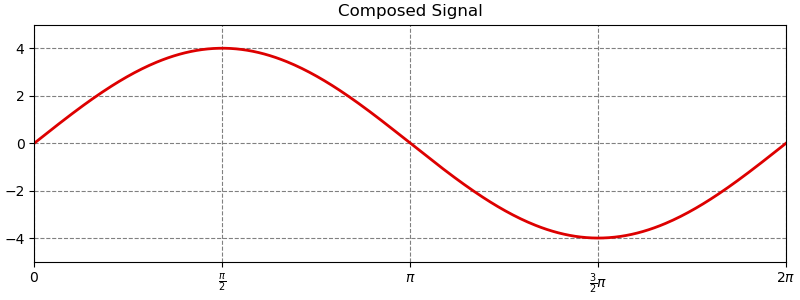

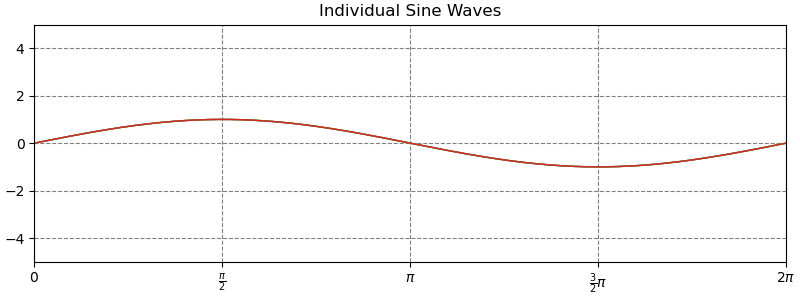

In [5]:
# render the plots and widgets
output = widgets.Output()

with output:
    fig1, ax1 = plt.subplots(constrained_layout=True, figsize=(8, 3))
    fig2, ax2 = plt.subplots(constrained_layout=True, figsize=(8, 3))


# move the toolbar to the bottom
fig1.canvas.toolbar_position = 'bottom'
fig2.canvas.toolbar_position = 'bottom'

trigStaticN(x, sin_waves, fig1, ax1, fig2, ax2)

control_elements = setup_gui()

widgets.HBox([control_elements , output])